# From the given iris dataset, predict the optimal number of clusters and represent it visually

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
from sklearn.datasets import load_iris

In [202]:
iris = load_iris()

In [203]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [204]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [205]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [206]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# creation of dataset

In [207]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [208]:
df[:50].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [209]:
df.iloc[:,[0,1,2,3]]           

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [210]:
x = df.iloc[:,[0,1,2,3]].values
css = []
from sklearn.cluster import KMeans
    
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    model.fit(x)
    css.append(model.inertia_)

In [211]:
x[0]

array([5.1, 3.5, 1.4, 0.2])

Text(0, 0.5, 'css')

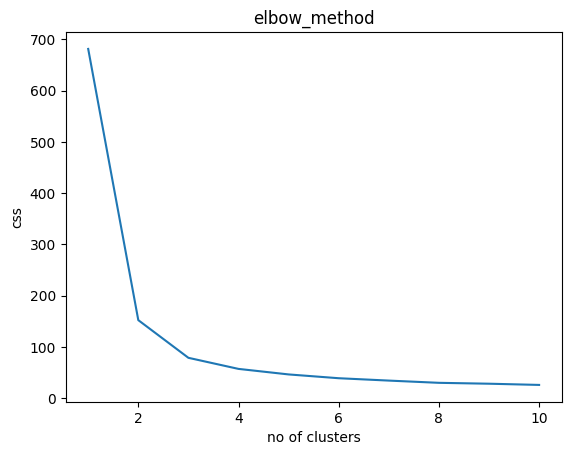

In [212]:
plt.plot(range(1,11),css)
plt.title('elbow_method')
plt.xlabel('no of clusters')
plt.ylabel('css')

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

# applying k-means clustering algorithm to the dataset

In [213]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')

In [217]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [220]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [221]:
df['cluster'] = y_predicted

In [222]:
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [223]:
model.cluster_centers_

array([[1.33846154, 0.20769231],
       [4.96470588, 1.75294118],
       [4.0375    , 1.2375    ],
       [6.6       , 2.06666667],
       [5.7375    , 1.7375    ],
       [5.79230769, 2.3       ],
       [4.53478261, 1.42173913],
       [3.41428571, 1.05714286],
       [5.26      , 2.17      ],
       [1.59583333, 0.2875    ]])

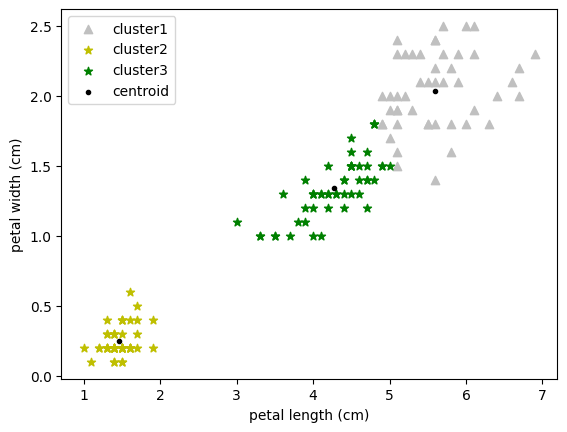

In [227]:
# Visualising the clusters - On the first two columns

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='silver',marker='^',label='cluster1')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='y',marker='*',label='cluster2')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='g',marker='*',label='cluster3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='.',label='centroid')
plt.legend()
